In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', delimiter = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of clusters: 2
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0]
Weights: [0.4958854 0.5041146]
Means: [[0.52927901 0.68440066 0.32790862 0.3555542  0.27527272 0.14587449
  0.2526639  0.60270118 0.31076302 0.16447835 0.70082967 0.18147204
  0.77116776]
 [0.52766496 0.68195609 0.31684688 0.35433812 0.27388947 0.15111212
  0.27520342 0.59805256 0.34244164 0.17082553 0.69852919 0.18320021
  0.77118633]]
Type of covariance_GMM:

(0.92, 0.26136363636363635)

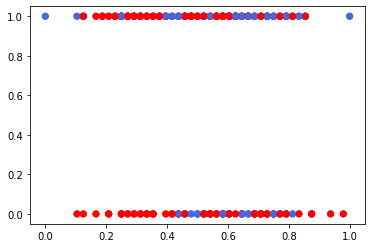

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

scale = MinMaxScaler()
X = dataset.drop('target',axis=1)
y = dataset['target']
x = scale.fit_transform(X)

X = dataset[['restecg','fbs','chol','age']]

colors = ['royalblue','red']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

GM_n_classes = 2

gmm = GaussianMixture(n_components=GM_n_classes, covariance_type='tied',max_iter=100,init_params='random',random_state = 35)
GMcluster_fit = gmm.fit(x)
GMlabels = GMcluster_fit.predict(x)

print('Number of clusters: ' + format(len(np.unique(GMlabels))))

# predict the cluster for each data point
y = gmm.predict(x)
print(y)

weights_GMM = gmm.weights_
print("Weights:",weights_GMM)

means_GMM = gmm.means_
print("Means:",means_GMM)

covariance_GMM = gmm.covariances_
print("Type of covariance_GMM:",type(covariance_GMM))

covariance_GMM.size

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

plt.scatter(x[:,0], x[:,1],c=vectorizer(y))

#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=65)

grd2 = GridSearchCV(estimator = SVC(kernel='rbf'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']

                  }, cv=3,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid2 = grd2.fit(x,y)

best_parameters = grid2.best_params_
print("The best paramters are for RBF Kernel: \n",best_parameters)

best_model2 = SVC(kernel='rbf', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True).fit(x_train,y_train)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model2, x_train, y_train, cv=3, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

y_pred_svm2 =best_model2.predict(x_test)

cm_svm2 = confusion_matrix(y_test, y_pred_svm2)
print(cm_svm2)

recall_svm2 = cm_svm2[0][0]/(cm_svm2[0][0] + cm_svm2[0][1])
precision_svm2 = cm_svm2[0][0]/(cm_svm2[0][0]+cm_svm2[1][1])
recall_svm2,precision_svm2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix